In [140]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Decision Tree Exercises: 
- https://ds.codeup.com/classification/decision-trees/

Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

In [14]:
#obtain the titanic data and turn into a dataframe
import acquire_cu
import prepare_cu

df = acquire_cu.get_titanic_data()

In [16]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [30]:
df.columns

Index(['passenger_id', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'deck', 'embark_town', 'alone'],
      dtype='object')

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
passenger_id,891.0,445.000000,257.353842,0.00,222.5000,445.0000,667.5,890.0000
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
alone,891.0,0.602694,0.489615,0.00,0.0000,1.0000,1.0,1.0000


In [63]:
#Train Validate Test
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df['survived'])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate['survived'])
    return train, validate, test

In [64]:
#add baseline column noting 0 as 0 is not survived
df['baseline'] = '0'
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone,baseline
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1,0
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1,0


In [65]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='survived', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

#FYI not dropping any columns
X_train = train
y_train = train.survived

X_validate = validate
y_validate = validate.survived

X_test = test
y_test = test.survived

In [106]:
train, validate, test = prepare_cu.prep_titanic(acquire_cu.get_titanic_data())
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S
583,583,0,1,male,36.000000,0,0,40.1250,C,First,Cherbourg,1,0,0
337,337,1,1,female,41.000000,0,0,134.5000,C,First,Cherbourg,1,0,0
50,50,0,3,male,7.000000,4,1,39.6875,S,Third,Southampton,0,0,1
218,218,1,1,female,32.000000,0,0,76.2917,C,First,Cherbourg,1,0,0
31,31,1,1,female,29.916875,1,0,146.5208,C,First,Cherbourg,0,0,0


In [107]:
#count of survived => and we see there are more deaths 0
train.survived.value_counts()

0    307
1    190
Name: survived, dtype: int64

In [108]:
# baseline accuracy

In [109]:
# set the baseline
train['baseline'] =0

In [117]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S,baseline
583,583,0,1,male,36.000000,0,0,40.1250,C,First,Cherbourg,1,0,0,0
337,337,1,1,female,41.000000,0,0,134.5000,C,First,Cherbourg,1,0,0,0
50,50,0,3,male,7.000000,4,1,39.6875,S,Third,Southampton,0,0,1,0
218,218,1,1,female,32.000000,0,0,76.2917,C,First,Cherbourg,1,0,0,0
31,31,1,1,female,29.916875,1,0,146.5208,C,First,Cherbourg,0,0,0,0


In [119]:
train.shape

(497, 15)

# 1. What is your baseline prediction? What is your baseline accuracy?
- Baseline prediction is 62% accuracy when always predicting death 

In [133]:
# create classification report of baseline model
baseline_class_report = classification_report(train.survived, train.baseline, zero_division=True)
print(baseline_class_report)

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       307
           1       1.00      0.00      0.00       190

    accuracy                           0.62       497
   macro avg       0.81      0.50      0.38       497
weighted avg       0.76      0.62      0.47       497



# 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [134]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S,baseline
583,583,0,1,male,36.000000,0,0,40.1250,C,First,Cherbourg,1,0,0,0
337,337,1,1,female,41.000000,0,0,134.5000,C,First,Cherbourg,1,0,0,0
50,50,0,3,male,7.000000,4,1,39.6875,S,Third,Southampton,0,0,1,0
218,218,1,1,female,32.000000,0,0,76.2917,C,First,Cherbourg,1,0,0,0
31,31,1,1,female,29.916875,1,0,146.5208,C,First,Cherbourg,0,0,0,0


In [142]:
#model will be class, fare paid and if they are traveling with someone

X_cols = ['pclass', 'fare', 'sibsp']
y_col = 'survived'

X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [143]:
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)

print(f'training score: {model1.score(X_train, y_train):.2%}')
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

training score: 86.92%
validate score: 70.09%


In [144]:
print('training accuracy: %4f' % model1.score(X_train, y_train))

training accuracy: 0.869215


In [154]:
# plot the decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

X, y = df[['survived']], df.pclass

tree = DecisionTreeClassifier()
tree.fit(X, y)

DecisionTreeClassifier()

In [155]:
tree.score(X, y)

0.5701459034792368

In [156]:
# decision tree
print(export_text(tree, feature_names=X.columns.tolist()))

|--- survived <= 0.50
|   |--- class: 3
|--- survived >  0.50
|   |--- class: 1



In [161]:
#tree with weights
print(export_text(tree, feature_names=X.columns.tolist(), show_weights=True))

|--- survived <= 0.50
|   |--- weights: [80.00, 97.00, 372.00] class: 3
|--- survived >  0.50
|   |--- weights: [136.00, 87.00, 119.00] class: 1



# 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report. - compute metrics on the TRAIN set


In [162]:
# look at the model scores for training set and validate set
print(f'training score: {model1.score(X_train, y_train):.2%}')
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

training score: 86.92%
validate score: 70.09%


In [163]:
# use model 1 to predict on the TRAIN set
# add a column for model1 predictions
train['model1_prediction'] = model1.predict(X_train)
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S,baseline,model1_prediction
583,583,0,1,male,36.000000,0,0,40.1250,C,First,Cherbourg,1,0,0,0,0
337,337,1,1,female,41.000000,0,0,134.5000,C,First,Cherbourg,1,0,0,0,1
50,50,0,3,male,7.000000,4,1,39.6875,S,Third,Southampton,0,0,1,0,0
218,218,1,1,female,32.000000,0,0,76.2917,C,First,Cherbourg,1,0,0,0,1
31,31,1,1,female,29.916875,1,0,146.5208,C,First,Cherbourg,0,0,0,0,1


In [164]:
# do classification report comparing actuals to model 1's predictions (for the TRAIN set)
model1_class_report = classification_report(train.survived, train.model1_prediction, zero_division=True)
print(model1_class_report)

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       307
           1       0.96      0.69      0.80       190

    accuracy                           0.87       497
   macro avg       0.90      0.83      0.85       497
weighted avg       0.88      0.87      0.86       497



In [165]:
# print confusion matrix
confusion_matrix(train.survived, train.model1_prediction)

#TP: Died, predicted dead: 301
#FP: Alive, predicted dead: 6
#FN: Dead, predicted alive: 59
#TN: Alive, predicted alive: 131

array([[301,   6],
       [ 59, 131]])

# 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support. - compute metrics on the VALIDATE set

In [166]:
# print the model score on the validate set
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

validate score: 70.09%


In [167]:
# add model 1 prediction column to the validate df
validate['model1_prediction'] = model1.predict(X_validate)
validate.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S,model1_prediction
610,610,0,3,female,39.000000,1,5,31.2750,S,Third,Southampton,0,0,1,0
424,424,0,3,male,18.000000,1,1,20.2125,S,Third,Southampton,0,0,1,0
568,568,0,3,male,29.916875,0,0,7.2292,C,Third,Cherbourg,1,0,0,0
701,701,1,1,male,35.000000,0,0,26.2875,S,First,Southampton,1,0,1,1
101,101,0,3,male,29.916875,0,0,7.8958,S,Third,Southampton,1,0,1,0


In [168]:
# run classification report for model 1 on validate set
model1_class_report = classification_report(validate.survived, validate.model1_prediction, zero_division=True)
print(model1_class_report)

              precision    recall  f1-score   support

           0       0.71      0.88      0.78       132
           1       0.68      0.41      0.52        82

    accuracy                           0.70       214
   macro avg       0.69      0.65      0.65       214
weighted avg       0.70      0.70      0.68       214



In [170]:
confusion_matrix(validate.survived, validate.model1_prediction)

#TP: Died, predicted dead: 116
#FP: Alive, predicted dead: 16
#FN: Dead, predicted alive: 48
#TN: Alive, predicted alive: 34

array([[116,  16],
       [ 48,  34]])

# 5. Run through steps 2-4 using a different max_depth value.

In [171]:
# create model 2
# change depth to 4
model2 = DecisionTreeClassifier(max_depth=4)

# fit to train dataset
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

[Text(412.92, 440.31600000000003, 'X[1] <= 9.715\ngini = 0.472\nsamples = 497\nvalue = [307, 190]'),
 Text(223.2, 342.468, 'X[2] <= 3.0\ngini = 0.278\nsamples = 186\nvalue = [155, 31]'),
 Text(178.56, 244.62, 'X[1] <= 7.883\ngini = 0.272\nsamples = 185\nvalue = [155, 30]'),
 Text(89.28, 146.772, 'X[1] <= 7.729\ngini = 0.334\nsamples = 99\nvalue = [78, 21]'),
 Text(44.64, 48.924000000000035, 'gini = 0.171\nsamples = 53\nvalue = [48, 5]'),
 Text(133.92000000000002, 48.924000000000035, 'gini = 0.454\nsamples = 46\nvalue = [30, 16]'),
 Text(267.84000000000003, 146.772, 'X[1] <= 7.91\ngini = 0.187\nsamples = 86\nvalue = [77, 9]'),
 Text(223.2, 48.924000000000035, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(312.48, 48.924000000000035, 'gini = 0.248\nsamples = 62\nvalue = [53, 9]'),
 Text(267.84000000000003, 244.62, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(602.64, 342.468, 'X[1] <= 50.987\ngini = 0.5\nsamples = 311\nvalue = [152, 159]'),
 Text(491.04, 244.62, 'X[1] <= 39.5\ng

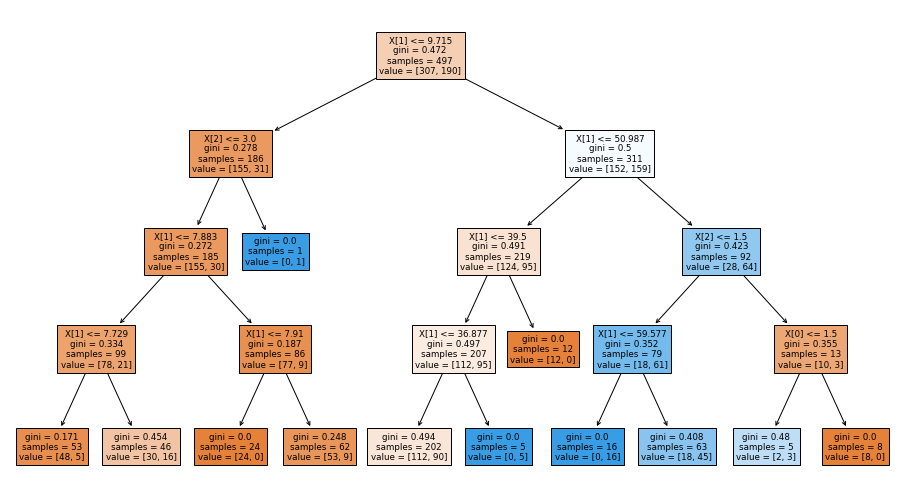

In [172]:
# visualize model2
plt.figure(figsize = (16,9))
plot_tree(model2, filled = True )

In [176]:
# run metrics on train set
# training score
print(f'Training Set Precision Score: {model2.score(X_train, y_train):.2%}')
# column of predictions to dataframe
train['model2_predictions'] = model2.predict(X_train)


Training Set Precision Score: 71.83%


In [177]:
# do classification report comparing actuals to model 2's predictions (for the TRAIN set)
model2_class_report = classification_report(train.survived, train.model1_prediction, zero_division=True)
print(model2_class_report)

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       307
           1       0.96      0.69      0.80       190

    accuracy                           0.87       497
   macro avg       0.90      0.83      0.85       497
weighted avg       0.88      0.87      0.86       497



In [179]:
# confusion matrix
print('Confusion Matrix for model 2 on Train Set')
print(confusion_matrix(train.survived, train.model2_predictions))

Confusion Matrix for model 2 on Train Set
[[287  20]
 [120  70]]


# 6. Which model performs better on your in-sample data?
 - Model 1 = 87% 
 - Model 2 = 87% 
 
    - Model models have similar performance

# 7. Which model performs best on your out-of-sample data, the validate set?
- Both model 1 and 2 have similar perofrmances 

In [ ]:
# -------------------------- # 

In [120]:
# set the baseline for X_train
X_train['baseline'] =0

In [121]:
X_train.head()

,pclass,fare,sibsp,baseline
583,1,40.1250,0,0
337,1,134.5000,0,0
50,3,39.6875,4,0
218,1,76.2917,0,0
31,1,146.5208,1,0


In [123]:
X_train.shape

(497, 4)

# Train Model

- Create the object: 
- Create the Decision Tree object with desired hyper-parameters

In [100]:
# for classification you can change the alorithm to gini or entropy (information gain) 
# Default is gini
# clf = classification

clf = DecisionTreeClassifier(max_depth=3, random_state=123)

- Fit the model
- fit the random forrest algorithm to the training data

In [101]:
model1.fit(X_train, y_train)

clf=clf.fit(X_train, y_train)

In [104]:
clf

DecisionTreeClassifier(max_depth=3, random_state=123)

In [180]:
#--------------------------#

# Random Forrest Exercises
- https://ds.codeup.com/classification/random-forests/

In [184]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from pydataset import data

- Create the object
    - Create theRandom Forrest Object with desired hyper-parameters: 
        - from sklearn.ensemble import RandomForestClassifier

In [185]:
# All of these can be passed as key word arguments to RandomForestClassifier
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [189]:
rf

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

Continue working in your model file with titanic data to do the following:

1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [190]:
# Fit the model
# Fit the random forest algorithm to the training data.
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [192]:
# Feature Importance
# Evaluate importance, or weight, of each feature.
print(rf.feature_importances_)

[0.32166813 0.50794425 0.17038762]


In [194]:
# Make Predictions
# Classify each flower by its estimated species.

y_pred = rf.predict(X_train)
y_pred 

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,

2. Evaluate your results using the model score, confusion matrix, and classification report.

3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.